# Dataset 


## Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1)

## Inspiration
Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

In [3]:
import pandas as pd
# warning remove
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("data/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# Understand the problem


In [5]:
df.Outcome.unique()

array([1, 0], dtype=int64)

# Missing value
We saw on df.head() that some features contain 0, it doesn't make sense here and this indicates missing value Below we replace 0 value by NaN:

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<!--  --> 
# Train and Test Dataset

In [7]:
from sklearn.model_selection import train_test_split

X = df.drop("Outcome", axis=1)
y = df.Outcome

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [8]:
X_train.shape , X_test.shape

((537, 8), (231, 8))

## Random Forest
Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. 

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Random Forest
rf = RandomForestClassifier(n_jobs=-1, n_estimators=50, max_features=7, random_state=45)
rf.fit(X_train, y_train)

# prediction
predict = rf.predict(X_test)

# result report
report = classification_report(y_test, predict)

print(report)

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       150
           1       0.74      0.57      0.64        81

    accuracy                           0.78       231
   macro avg       0.77      0.73      0.74       231
weighted avg       0.78      0.78      0.77       231



In [10]:
X_test.iloc[100]

Pregnancies                   4.000
Glucose                     110.000
BloodPressure                92.000
SkinThickness                 0.000
Insulin                       0.000
BMI                          37.600
DiabetesPedigreeFunction      0.191
Age                          30.000
Name: 10, dtype: float64

In [11]:
X_test.iloc[100].values.reshape(1, -1).shape

(1, 8)

In [12]:
rf.predict([X_test.iloc[100]]) 

array([0], dtype=int64)

In [13]:
y_test.iloc[100]

0

In [14]:
from sklearn.metrics import roc_auc_score

# Plot ROC Curves

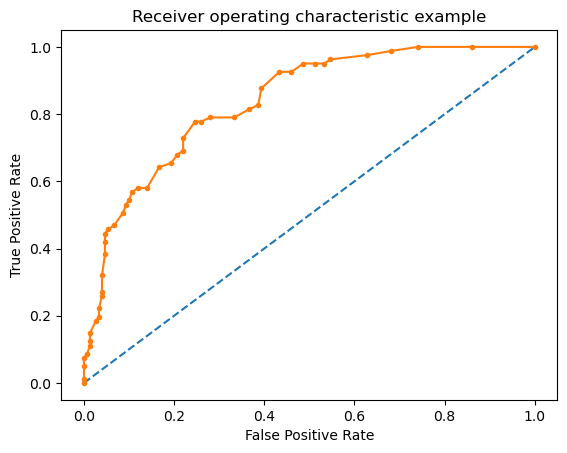

[2.   1.   0.98 0.94 0.92 0.9  0.86 0.84 0.82 0.8  0.76 0.74 0.72 0.7
 0.68 0.66 0.64 0.62 0.6  0.58 0.56 0.54 0.52 0.5  0.48 0.46 0.44 0.42
 0.4  0.38 0.36 0.34 0.32 0.3  0.28 0.26 0.24 0.2  0.18 0.16 0.14 0.12
 0.1  0.08 0.06 0.04 0.02 0.  ]
[0.         0.01234568 0.04938272 0.07407407 0.08641975 0.11111111
 0.12345679 0.14814815 0.18518519 0.19753086 0.22222222 0.25925926
 0.27160494 0.32098765 0.38271605 0.41975309 0.44444444 0.45679012
 0.4691358  0.50617284 0.5308642  0.54320988 0.56790123 0.58024691
 0.58024691 0.64197531 0.65432099 0.67901235 0.69135802 0.72839506
 0.77777778 0.77777778 0.79012346 0.79012346 0.81481481 0.82716049
 0.87654321 0.92592593 0.92592593 0.95061728 0.95061728 0.95061728
 0.96296296 0.97530864 0.98765432 1.         1.         1.        ]


In [15]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as pyplot

# predict probabilities
yhat = rf.predict_proba(X_test)
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]

# plot no skill/RANDOM roc curve
pyplot.plot([0, 1], [0, 1], linestyle='--')

# calculate roc curve for model
fpr, tpr, thresholds = roc_curve(y_test, pos_probs)

# plot model roc curve
pyplot.plot(fpr, tpr, marker='.')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title("Receiver operating characteristic example")

# show the plot
pyplot.show()
print(thresholds)
print(tpr)

# Reference
- Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.
